# EDA

In [1]:
import pandas as pd
import json
import seaborn as sns
import matplotlib.pyplot as plt

# JSONL 파일 경로
file_path = "../resource/data/nikluge-ea-2023-train.jsonl"

# JSONL 파일을 줄 단위로 읽어서 각 줄을 딕셔너리로 변환하고, 이를 리스트에 추가합니다.
data = []
with open(file_path, 'r') as f:
    for line in f:
        json_line = json.loads(line)
        row = {}
        row['id'] = json_line['id']
        row['input'] = json_line['input']['form']
        row['target'] = json_line['input']['target']['form']
        row['span_begin'] = json_line['input']['target']['begin']
        row['span_end'] = json_line['input']['target']['end']
        
       # Output dictionary에서 감정 값을 추출하여 row에 추가합니다.
        for emotion, value in json_line['output'].items():
            row[emotion] = value
        
        data.append(row)

# 리스트를 DataFrame으로 변환합니다.
train_df = pd.DataFrame(data)

In [2]:
train_df

,id,input,target,span_begin,span_end,joy,anticipation,trust,surprise,disgust,fear,anger,sadness
0,nikluge-2023-ea-train-000001,하... 근데 준프샤 너무 고소각임...,준프샤,8.0,11.0,True,False,False,False,False,False,False,False
1,nikluge-2023-ea-train-000002,2기였나 지은북이랑 4기 메거진은 지금도 읽는데,4기 메거진,11.0,17.0,True,False,False,False,False,False,False,False
2,nikluge-2023-ea-train-000003,흐아아아아악 흐아아아아악악악악 됭햄 손차이가 절케 난다니 알고는 있엇지만 놀랍다 ㅣ...,됭햄 손차이,17.0,23.0,False,False,False,True,False,False,False,False
3,nikluge-2023-ea-train-000004,도브가 반반을 가고 프린스가 안밀린다면 하는 상상,None,NaN,NaN,False,True,False,False,False,False,False,False
4,nikluge-2023-ea-train-000005,담주에 티켓팅 공지 뜨고 다담주에 티켓팅할 느낌,티켓팅 공지,4.0,10.0,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
37927,nikluge-2023-ea-train-038684,저 등근육 때문에 역린 보러 영화관 5번 감…,등근육,2.0,5.0,True,False,False,False,False,False,False,False
37928,nikluge-2023-ea-train-038685,진짠데.. 나 헤테로 잘 안 잡는데...,헤테로,8.0,11.0,False,False,False,False,True,False,False,False
37929,nikluge-2023-ea-train-038686,고공화국 제일검이 소레수를 쓰는데 힐트는 또 펜싱검이라니 세상에나 &others&,펜싱검,25.0,28.0,False,False,False,True,False,False,False,False
37930,nikluge-2023-ea-train-038687,액션덕후는 다만악이후로 레이로 액션하는 잴을 다시 한번 더 볼수있는사실에 감격ㅠ,사실,37.0,39.0,True,False,False,False,False,False,False,False


## train set의 문자열 길이 정보

### train set의 input 문자열 길이 정보

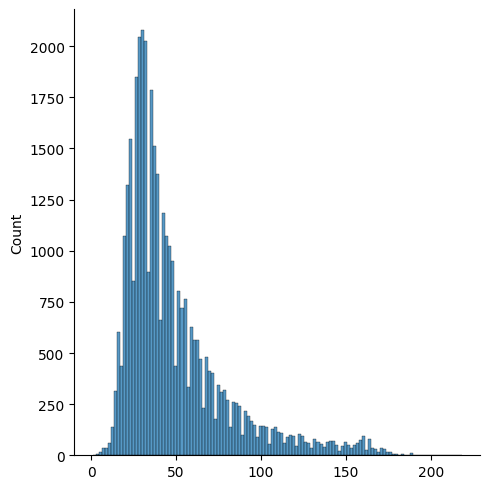

In [3]:
train_input_lengths = [len(t) for t in train_df["input"]]
sns.displot(train_input_lengths)

### train set의 target 문자열 길이 정보

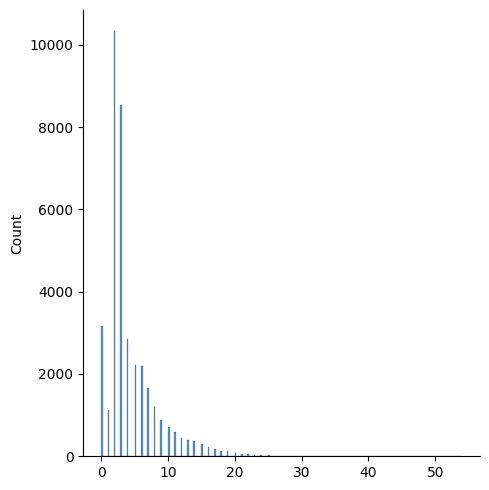

In [4]:
train_target = train_df["target"].fillna("")
train_target_lengths = [len(t) for t in train_target]
sns.displot(train_target_lengths)

## train set의 감정 라벨 정보

In [5]:
emotion_cols = ['joy', 'anticipation', 'trust', 'surprise', 'disgust', 'fear', 'anger', 'sadness']

In [6]:
# 문자열을 불리언으로 변환합니다.
for col in emotion_cols:
    train_df[col] = train_df[col] == 'True'

### 감정 별 발생률 그래프

joy             0.561900
anticipation    0.244464
trust           0.058209
surprise        0.068992
disgust         0.039993
fear            0.022171
anger           0.042576
sadness         0.065380
dtype: float64


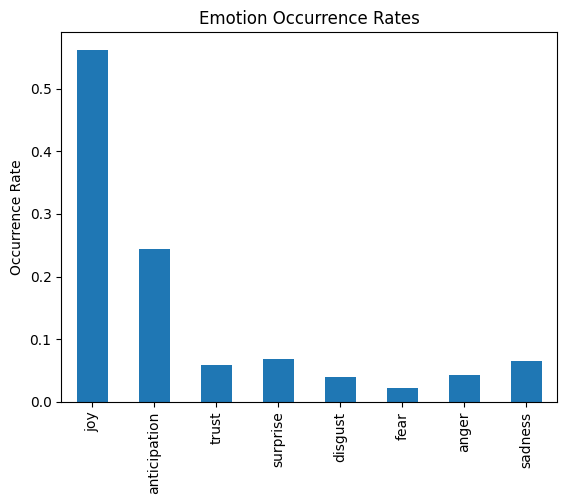

In [7]:
# 1. 각각의 감정에 대한 발생률을 계산하고 그래프로 나타냅니다.
emotion_counts = train_df[emotion_cols].mean()
emotion_counts.plot(kind='bar')
plt.title('Emotion Occurrence Rates')
plt.ylabel('Occurrence Rate')
print(emotion_counts)
plt.show()

### 데이터 별 라벨링 된 감정 수

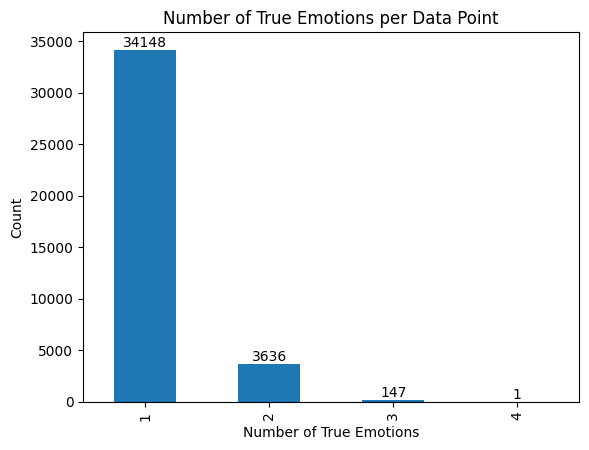

In [8]:
# 2. 각 데이터 별 True인 감정의 개수를 계산하고 그래프로 나타냅니다.
train_df['num_true_emotions'] = train_df[emotion_cols].sum(axis=1)
counts = train_df['num_true_emotions'].value_counts().sort_index()
ax = counts.plot(kind='bar')

# 막대 위에 count 값을 표시합니다.
for i in range(len(counts)):
    ax.text(i, counts.iloc[i], str(counts.iloc[i]), ha='center', va='bottom')

plt.title('Number of True Emotions per Data Point')
plt.xlabel('Number of True Emotions')
plt.ylabel('Count')
plt.show()